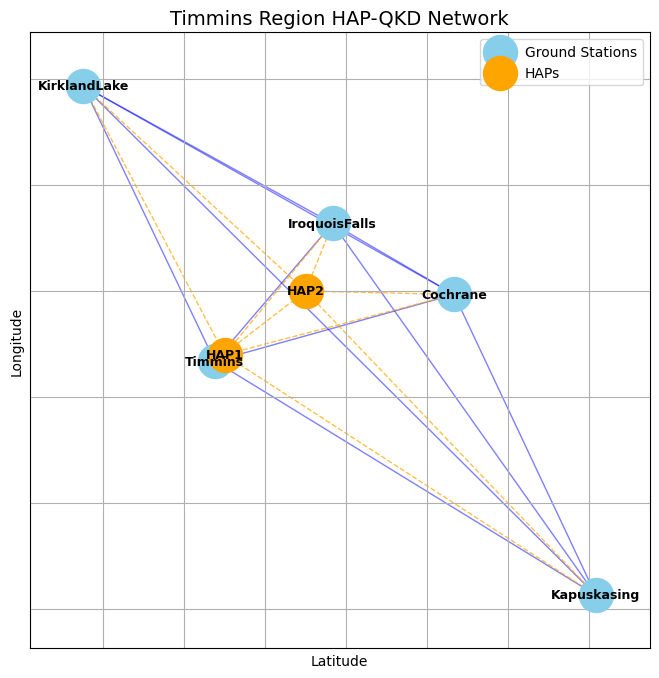

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# --------------------------
# Ground Stations (GS) Setup
# --------------------------
# Cities around Timmins (with approx coordinates)
gss = {
    "Timmins":   (48.4758, -81.3305),   # Main city in the region
    "IroquoisFalls": (48.7669, -80.6814), # ~70 km northeast of Timmins
    "Kapuskasing":   (49.4169, -82.4331), # ~160 km northwest of Timmins
    "Cochrane":      (49.0670, -81.0160), # ~110 km north of Timmins
    "KirklandLake":  (48.1512, -80.0326), # ~140 km southeast of Timmins
}

# --------------------------
# Graph for GS network
# --------------------------
links = nx.Graph()

# Add GS nodes
for city, coords in gss.items():
    links.add_node(city, pos=coords, type="GS")

# Connect GSs with links (assuming all connected pairwise for now)
for city1 in gss:
    for city2 in gss:
        if city1 != city2:
            links.add_edge(city1, city2, type="fiber")

# --------------------------
# HAP Setup
# --------------------------
# Assume 2 HAPs initially positioned above Timmins area
# Each has 50 km movement radius in 24h (time window studied)
haps = {
    "HAP1": {"initial": (48.5, -81.3), "radius_km": 50},  # Near Timmins center
    "HAP2": {"initial": (48.7, -81.0), "radius_km": 50},  # Slightly NE of Timmins
}

# Add HAP nodes to graph
for hap, info in haps.items():
    links.add_node(hap, pos=info["initial"], type="HAP")
    # Connect HAP to nearby GSs (initial assumption: all GSs within serviceable range)
    for city, coords in gss.items():
        links.add_edge(hap, city, type="HAP-GS")

# --------------------------
# Plot the network
# --------------------------
plt.figure(figsize=(8, 8))

# Extract positions
pos = nx.get_node_attributes(links, "pos")

# Separate GSs and HAPs for plotting with different colors
gs_nodes = [n for n, d in links.nodes(data=True) if d["type"] == "GS"]
hap_nodes = [n for n, d in links.nodes(data=True) if d["type"] == "HAP"]

# Draw GS nodes
nx.draw_networkx_nodes(links, pos, nodelist=gs_nodes, node_color="skyblue", node_size=600, label="Ground Stations")

# Draw HAP nodes
nx.draw_networkx_nodes(links, pos, nodelist=hap_nodes, node_color="orange", node_size=600, label="HAPs")

# Draw edges with different styles
fiber_edges = [(u, v) for u, v, d in links.edges(data=True) if d["type"] == "fiber"]
hap_edges = [(u, v) for u, v, d in links.edges(data=True) if d["type"] == "HAP-GS"]

nx.draw_networkx_edges(links, pos, edgelist=fiber_edges, edge_color="blue", style="solid", alpha=0.5)
nx.draw_networkx_edges(links, pos, edgelist=hap_edges, edge_color="orange", style="dashed", alpha=0.7)

# Draw labels
nx.draw_networkx_labels(links, pos, font_size=9, font_weight="bold")

plt.title("Timmins Region HAP-QKD Network", fontsize=14)
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid(True)
plt.show()

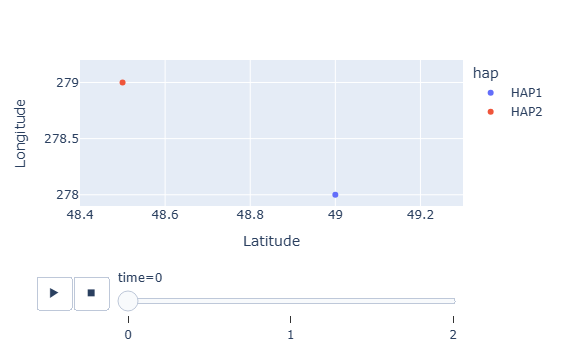

In [3]:
import plotly.express as px
import pandas as pd

def animate_hap_trajectories(times, lons_list, lats_list, hap_names):
    """
    Animate HAP trajectories over time using Plotly.

    Parameters
    ----------
    times : list or array
        List of time steps.
    lons_list : list of lists
        Each sublist is the longitude trajectory of a HAP over time.
    lats_list : list of lists
        Each sublist is the latitude trajectory of a HAP over time.
    hap_names : list of str
        Names/IDs of the HAPs (must match number of lons/lats sublists).
    """
    # Build DataFrame
    data = {"time": [], "lat": [], "lon": [], "hap": []}
    
    for hap_idx, hap_name in enumerate(hap_names):
        for t_idx, t in enumerate(times):
            data["time"].append(t)
            data["lat"].append(lats_list[hap_idx][t_idx])
            data["lon"].append(lons_list[hap_idx][t_idx])
            data["hap"].append(hap_name)
    
    df = pd.DataFrame(data)
    
    # Plot animated scatter
    fig = px.scatter(df, x="lat", y="lon", animation_frame="time", color="hap",
                     range_x=[min(map(min, lats_list)) - 0.1, max(map(max, lats_list)) + 0.1],
                     range_y=[min(map(min, lons_list)) - 0.1, max(map(max, lons_list)) + 0.1])
    fig.update_layout(xaxis_title="Latitude", yaxis_title="Longitude")
    fig.show()

times = [0, 1, 2]
lons_list = [[278, 278.1, 278.2], [279, 279.05, 279.1]]
lats_list = [[49, 49.1, 49.2], [48.5, 48.6, 48.65]]
hap_names = ["HAP1", "HAP2"]

animate_hap_trajectories(times, lons_list, lats_list, hap_names)